# **Regressão Linear Simples**
## Prevendo vendas de sorvetes com base na temperatura

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Importando a base de dados
dados = pd.read_excel("Sorvete.xlsx")
dados.head()

,Temperatura,Vendas_Sorvetes
0,26,268.125258
1,39,403.562400
2,34,339.279899
3,30,310.035329
4,27,273.616360


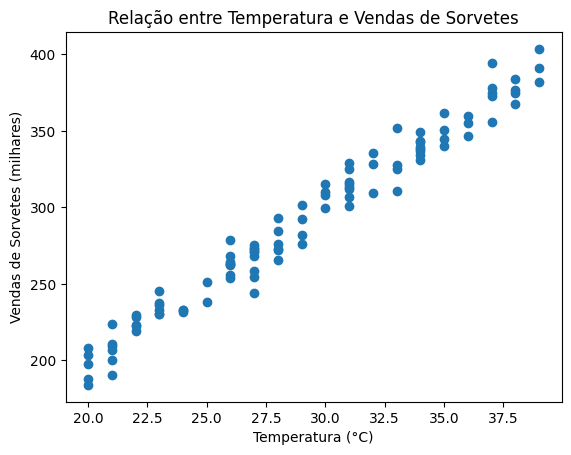

In [3]:
# Visualizando os dados
plt.scatter(dados['Temperatura'], dados['Vendas_Sorvetes'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvetes (milhares)')
plt.title('Relação entre Temperatura e Vendas de Sorvetes')
plt.show()

In [4]:
dados.corr() # A correlação mede a força e a direção do relacionamento linear entre duas variáveis, o que é fundamental para modelos de regressão linear.

,Temperatura,Vendas_Sorvetes
Temperatura,1.000000,0.985589
Vendas_Sorvetes,0.985589,1.000000


In [5]:
# Dividindo os dados em conjuntos de treinamento e teste
X = dados[['Temperatura']]  # Recurso (variável independente)
y = dados['Vendas_Sorvetes']  # Rótulo (variável dependente)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(X_test)
previsoes

array([361.32156563, 250.12460433, 341.10393631, 219.79816034,
       341.10393631, 391.64800962, 341.10393631, 270.34223366,
       270.34223366, 260.233419  , 310.77749232, 260.233419  ,
       341.10393631, 371.4303803 , 260.233419  , 270.34223366,
       260.233419  , 280.45104833, 209.68934568, 280.45104833])

O **RMSE** é a raiz quadrada do **MSE** *(Erro Quadrático Médio - Mean Squared Error)*. o **MSE** é a média dos quadrados das diferenças entre os valores reais e os valores previstos.

O **MAE** *(Erro Médio Absoluto - Mean Absolute Error)*, onde um valor pequeno para MAE significa que suas previsões estão próximas das reais.

O **"R-squared (R2)"** fornece informações sobre o ajuste geral do modelo. O valor do R2 pode variar entre 0 e 1, quanto mais próximo de 1, melhor, pois indica que o modelo explica uma maior proporção da variabilidade nos dados. O R2 é também uma das principais métricas de avaliação do modelo de regressão.

Erro Médio Quadrático: 101.64524989805876
Erro Absoluto Médio: 7.6809927436910055
R² (coeficiente de determinação): 0.9594169633031285


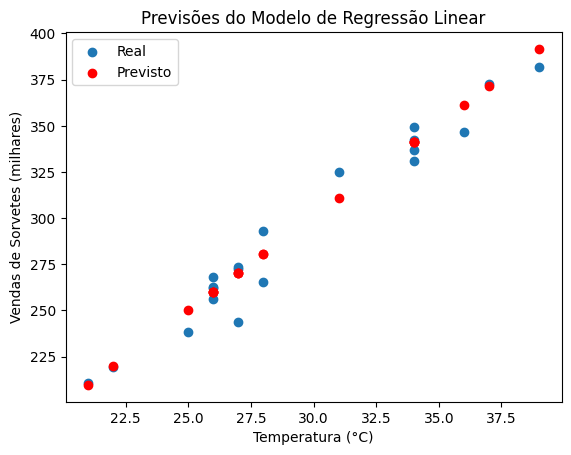

In [7]:
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

# Visualizando as previsões
plt.scatter(X_test, y_test, label='Real')
plt.scatter(X_test, previsoes, label='Previsto', color='red')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvetes (milhares)')
plt.title('Previsões do Modelo de Regressão Linear')
plt.legend()
plt.show()

# **Modelo de Regressão Linear Múltipla**

**Prever os valores médios** das casas nos distritos da Califórnia, considerando uma série de características desses distritos.

In [8]:
import pandas as pd

dataset = pd.read_csv("housing.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# Configurações para a aula...
# para deixar todas as saídas com os mesmos valores obtidos na live.
import numpy as np
np.random.seed(42)
import os

# Para plots bonitinhos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
set(dataset["ocean_proximity"]) # Variavel categorica

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

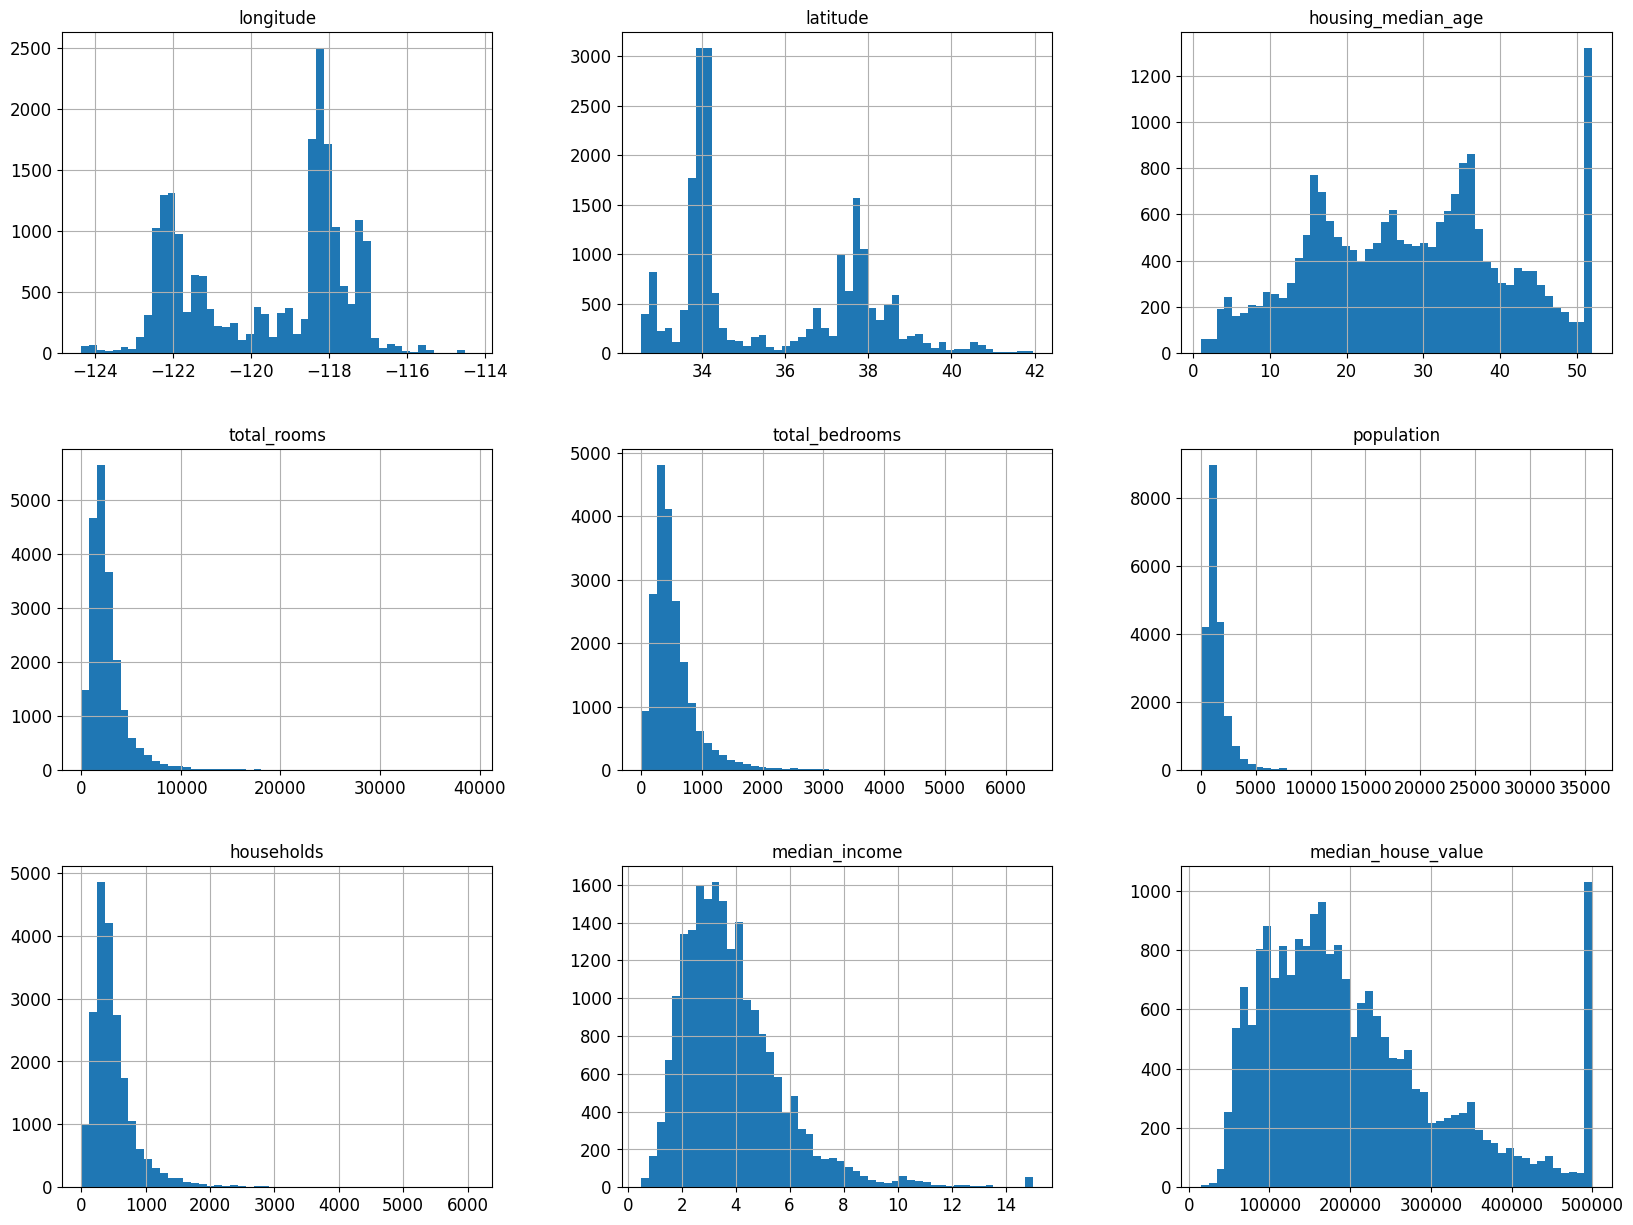

In [12]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

- median_income (renda média) não parece estar expresso em dólares americanos, dê uma olhadinha na escala dos dados. Aqui precisamos falar de dados dimensionados!

- a variável median_house_value (nossa target) também parece estar limitada em casas até 500 mil dólares. Aqui seria interessante entender com o cliente se o mesmo deseja que o algoritmo ultrapasse esse limite ou não.

- podemos identificar bastante assimetria nos dados.

In [13]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size = 0.2, random_state = 7)
print(len(df_train), "treinamento +", len(df_test), "teste")

16512 treinamento + 4128 teste


In [14]:
# Criando categorias de média de renda anual

# Divida por 1,5 para limitar o número de categorias de renda
# dividindo o valor da coluna "median_income" de cada entrada pelo valor 1,5 e, em seguida, arredondando o resultado para cima usando a função
# np.ceil() (da biblioteca NumPy). Isso cria uma nova coluna chamada "income_cat" no dataset que contém os valores das categorias de renda após
# a divisão e arredondamento.
dataset["income_cat"] = np.ceil(dataset["median_income"] / 1.5)  # ceil para arredondar valores para cima

# Rotule aqueles acima de 5 como 5 (sem usar inplace=True)
dataset["income_cat"] = dataset["income_cat"].where(dataset["income_cat"] < 5, 5.0)

# Usando pd.cut para criar categorias discretas
dataset["income_cat"] = pd.cut(
    dataset["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

# Verificando a distribuição das categorias
dataset["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

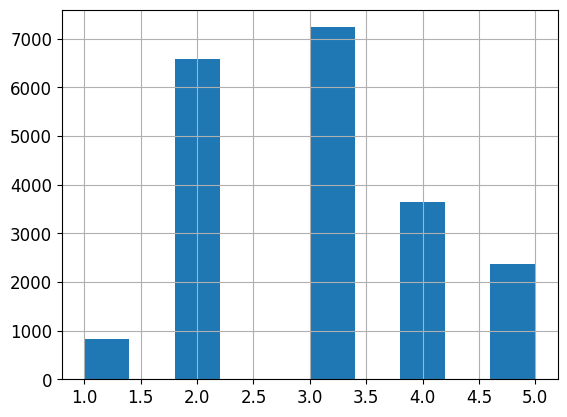

In [15]:
dataset["income_cat"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["income_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [17]:
# Analisando as proporções
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [18]:
# Analisando as proporções
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [ ]:
# Removendo o income_cat das bases de treino e teste
# O uso do termo set_ é uma convenção para indicar que é uma variável temporária que itera sobre um conjunto de dados (um conjunto de treinamento ou um conjunto de teste).

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)